# Capstone Project: Unsupervised Machine Learning

## UsArrest dataset Violent Crime Rates by US State

### Data description:
- Murder: The murder arrests (per 100,000 residents).
- Assault: The assault arrests (per 100,000 residents).
- UrbanPop: The percentage of the population that lives in urban areas.
- Rape: The rape arrests (per 100,000 residents).

## Exploring the data

##### Importing Modules & Loading UsArrests Data

In [393]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Loading the data
df = pd.read_csv("UsArrests.csv",index_col='City')
df.head(10)

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600
Colorado,7.900,204,78,38.700
Connecticut,3.300,110,77,11.100
Delaware,5.900,238,72,15.800
Florida,15.400,335,80,31.900


In [394]:
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 4


In [395]:
# Evaluating data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


The dataset consists of 50 rows and 4 columns of data with the city column from the dataset being set as the index. 

##### Checking for nulls

In [396]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


There are no missing values in this dataset, so there are no requirments to handle missing data.

##### Visualise the distribution of the observations for each feature

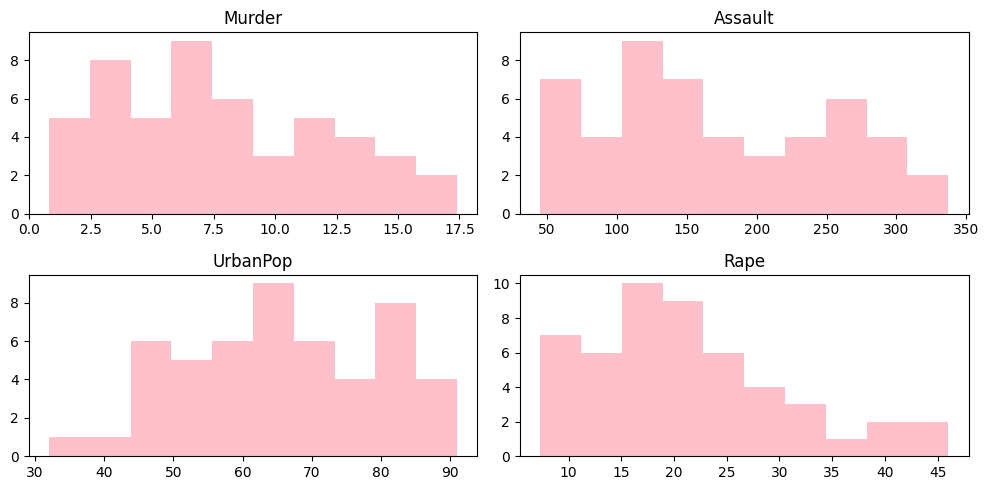

In [397]:
# Plot histograms
histograms = df.hist(color='pink', grid=False, figsize=(10, 5)) 
plt.tight_layout()
plt.show()

##### Columns Statistical Data

In [398]:
# To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() # Select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


<i>Dataset statistical findings:</i>
- Features are meassured on different scales.
- Murder and Rape are realtively low.
- Assualt rates are much higher.
- Urban population is meassured as a percentage.

Due to the nature of the large variences between the data scaling is needed.
> It is utterly important to carefully standardize your data because PCA works under the assumption that the data is normal distributed, and is very sensitive to the variance of the variables. Or in other words, large differences between the ranges of variables will dominate over those with small ranges. 
(https://erdogant.github.io/pca/pages/html/Algorithm.html)

> Scaling is crucial in clustering because it ensures that each feature contributes equally to the distance calculations. Without scaling, a feature with a larger range of values would disproportionately influence the distance metric, potentially leading to skewed results. https://www.linkedin.com/advice/1/what-role-does-scaling-normalization-play-clustering-3fnuf#:~:text=Scaling%20is%20crucial%20in%20clustering,potentially%20leading%20to%20skewed%20results.

## Correlation Analysis

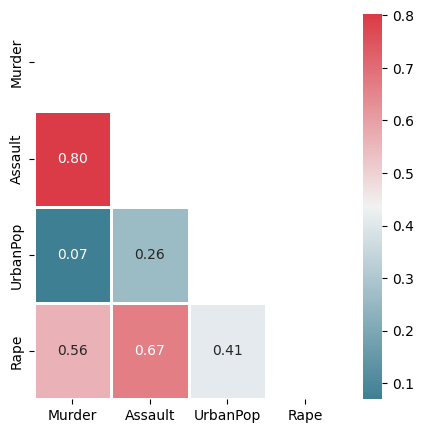

In [399]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

cities = df.index

# get correlations
corrs = df.corr()
labels = corrs.columns

# Plot figsize
fig, ax = plt.subplots(figsize=(5, 5))

# To mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()

<b>Dataset correlation Analysis findings:</b>
- <b>Assault and Murder:</b> Assault has a strong positive correlation with murder, indicating that areas with higher assault rates also tend to have higher murder rates. This makes sense as violence is usually a precursor to murder.

- <b>Rape and Murder:</b> Rape has a moderate positive correlation with murder, indicating that areas with higher murder rates also tend to have higher rape rates. Rape is a crime of violence, control, and power. Given that violence/assault has a high correlation with murder, this moderate correlation between rape and murder is consistent with expectations.

- <b>Assault and Rape:</b> Assault has a strong positive correlation with rape, indicating that areas with higher assault rates also tend to have higher rape rates. This is logical since rape is a crime of violence, control, and power, and therefore closely related to assault.

- <b>Urban Population and Crime Rates:</b> There appears to be a trend of low correlation between the urban population (UrbanPop) and the other crime variables (Assault, Rape, and Murder).

## Principal Component Analysis

### PCA: Unstandardised Data

In [400]:
from sklearn.decomposition import PCA 

np.set_printoptions(precision=2)

X = df.values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [401]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [402]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [403]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [404]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

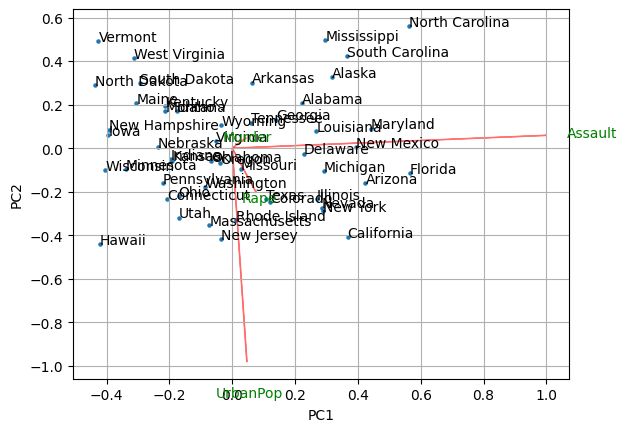

In [405]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

> Each point on a biplot is the projected observation, transformed from the original data.The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors.
- Based on this biplot, we can see that Assult and the UrbadPop are the most important features as the arrows to each of these dominate the biplot.

<i>This can be further quantified as see below: </i>

In [406]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


<b>Principle component feature analysis (Unstandardised):</b>
- In PC1, Assault is the dominant feature, whereas UrbanPop is the most dominant in PC2.
- The importance of Assault shifts from being the highest in PC1 to being the second last in PC2.
- UrbanPop shows a significant increase in importance from PC1 to PC2, becoming the most important feature in PC2.


### PCA: Standardised Data

In [407]:
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


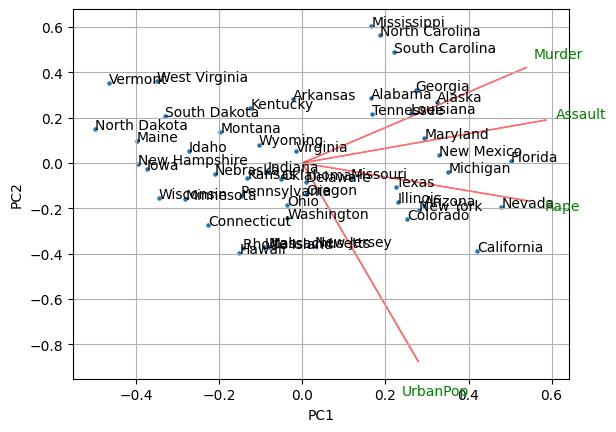

In [408]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

The standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it.

- States positioned in the same direction as the crime variables (Murder, Assault, Rape) likely have higher rates of these crimes.
- States positioned in the direction of UrbanPop have higher urban populations.
- The PCA helps to identify the patterns and relationships between the states and the variables.

In [409]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) # Components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


<b>Principle component feature analysis (Standardised):</b>
- In PC1, Assault is the most dominant feature, followed closely by Rape and Murder. UrbanPop is the least important feature in this component.
- In PC2, UrbanPop becomes the most important feature, significantly outpacing the others. Murder is the second most important feature, while Assault and Rape have much lower importance values.



### Determining the Optimal Number of Principal Components to Retain

Text(0.5, 1.0, 'Cumulative Explained Variance')

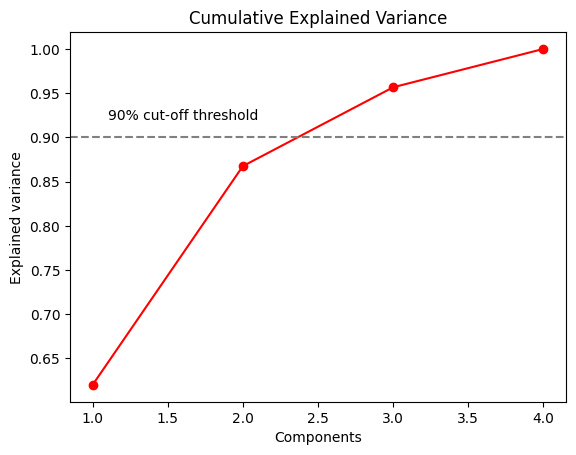

In [410]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red',marker='o')
plt.axhline(y=0.90, color='grey', linestyle='--')
plt.text(1.1, 0.92, '90% cut-off threshold', color = 'black', fontsize=10)
plt.title("Cumulative Explained Variance")

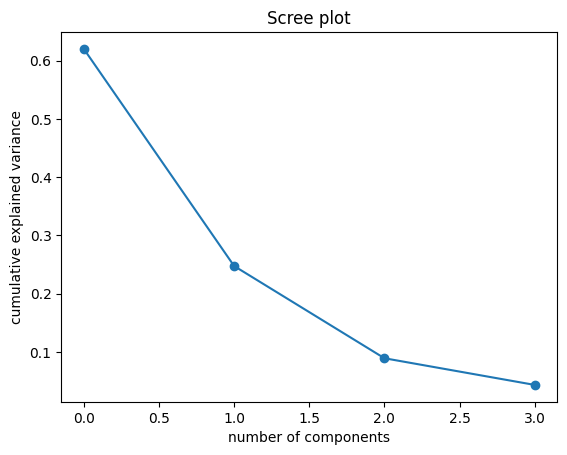

In [411]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_,marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The First two components exlpain just under 90% of the varience, it is therefore reasonable to conclude that retaining three components is a good choice. This retains most of the variability in the data while simplifying the dimensionality, which makes analysis more manageable and interpretable.

In [412]:
pca_df = pd.DataFrame(X_std_trans[:,0:2], index = df.index)
pca_df.head(10)

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543
Colorado,1.515,-0.988
Connecticut,-1.359,-1.089
Delaware,0.048,-0.325
Florida,3.013,0.039


## Cluster Analysis

### Hierarchical clustering

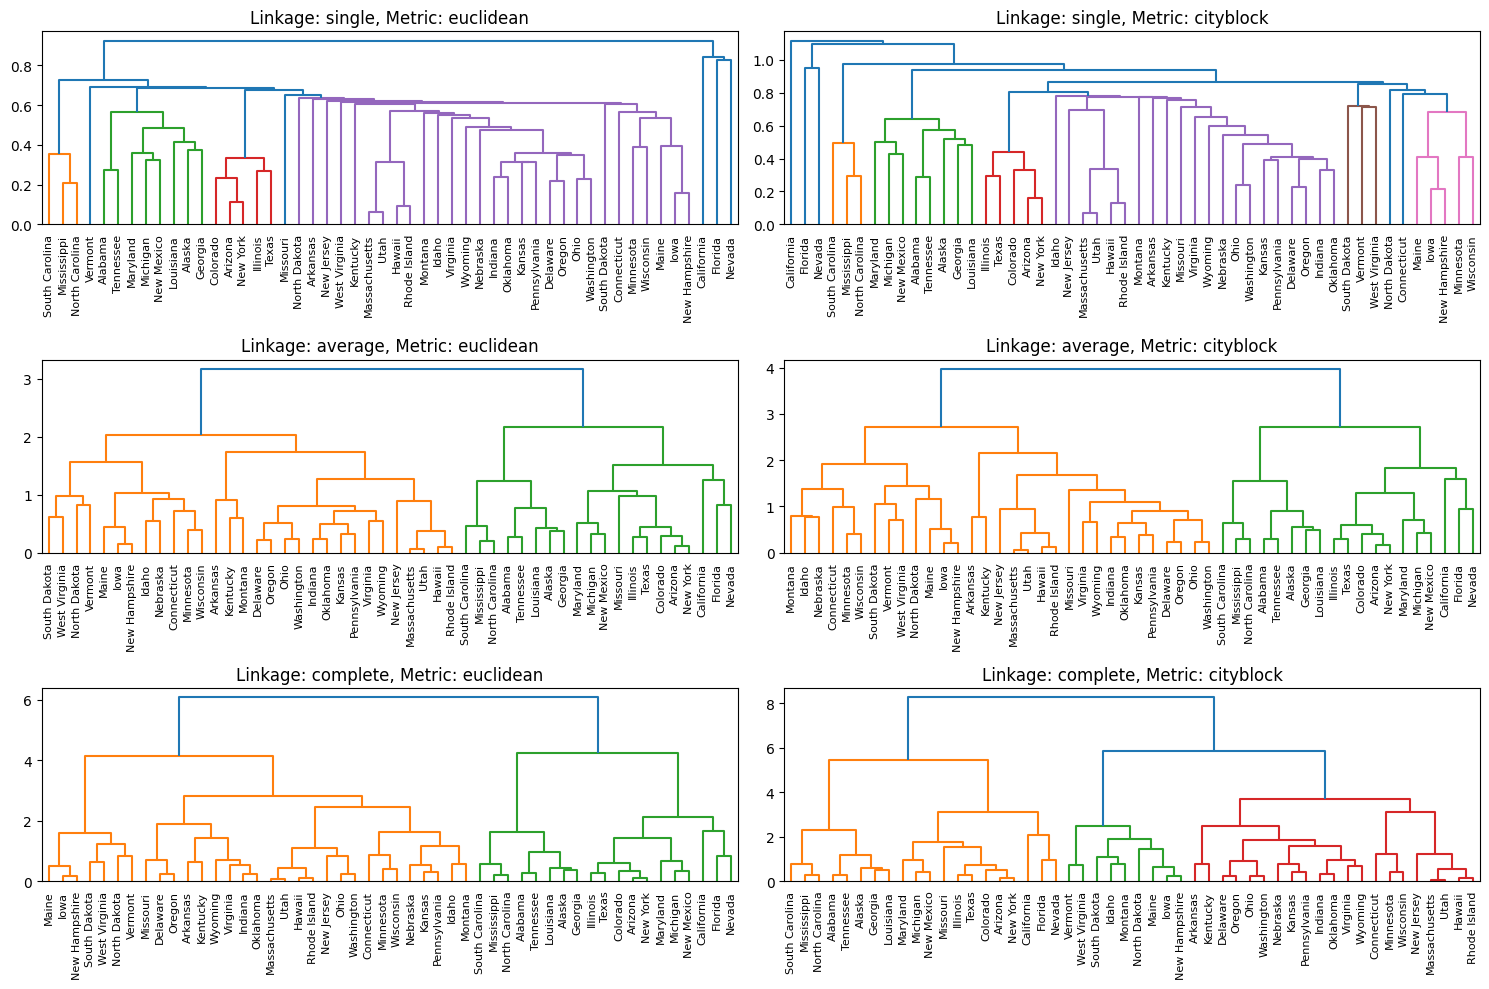

In [413]:
# Create Dendrograms
linkage_methods = ['single', 'average','complete']
distance_metrics = ['euclidean', 'cityblock']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(distance_metrics):
        linkage_matrix = linkage(pca_df, method=method, metric=metric)
        dendrogram(linkage_matrix, ax=axes[i*2 + j], labels=pca_df.index)
        axes[i*2 + j].set_title(f'Linkage: {method}, Metric: {metric}')

plt.tight_layout()
plt.show()

##### Verifying the dendrogram clustering based on the silhouette score

In [414]:
# Agglomerative Hierarchical Clustering
chosen_method = 'complete'
chosen_metric = 'euclidean'

for clus in range(2,6):
    n_clusters = clus
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=chosen_method, metric=chosen_metric)
    clusters = clustering.fit_predict(pca_df)

    #Evaluate Clustering with Silhouette Score
    silhouette_avg = round(silhouette_score(pca_df, clusters),2)
    print('Clusters : {}\nSilhouette Score: {}\n'.format(clus, silhouette_avg))

Clusters : 2
Silhouette Score: 0.47

Clusters : 3
Silhouette Score: 0.44

Clusters : 4
Silhouette Score: 0.42

Clusters : 5
Silhouette Score: 0.36



In [415]:
# Updating the clustering lables to reflect cluster choice based on analysis and silhouetter score
clustering = AgglomerativeClustering(n_clusters=2, linkage=chosen_method, metric=chosen_metric)
clusters = clustering.fit_predict(pca_df)

# Adding cluster labels to the dataframe
df['Hierarchical_Cluster'] = clusters


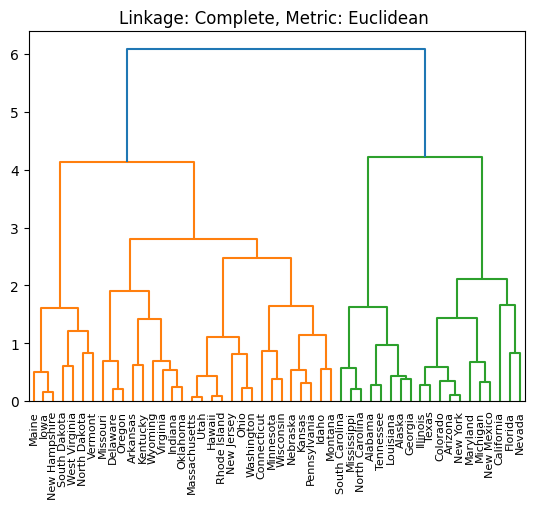

Visual representaion of validated clustering choice based on the silhoutte score 0.47.


In [416]:
plt.title("Linkage: Complete, Metric: Euclidean ")
dendrogram(linkage(pca_df, method='complete',metric='euclidean'), labels=pca_df.index)
plt.show()
print('Visual representaion of validated clustering choice based on the silhoutte score 0.47.')

<b>Hierarchical clustering analysis:</b>
- This dendrogram provides a visual summary of how the states cluster together based on the chosen linkage method and distance metric.
- The complete linkage method and Euclidean distance metric yielded the highest silhouette score.
- The silhouette score of 0.47 indicates a moderately good clustering solution. This score suggests that the clusters are reasonably well-defined and meaningful, though there is still room for improvement. It is possible that this may not be the best clustering algorithm for this data. Further investigation into different clustering algorithms and feature engineering could potentially yield a better silhouette score.

### K-means clustering

<b>Determining the Number of Clusters:</b>

Based on the first biplot, which showed two features dominating, and further evidence from the hierarchical clustering analysis, we have decided to set the number of clusters (k) to two. The hierarchical clustering analysis, supported by a silhouette score of 0.46, confirms that a two-cluster solution is a reasonable choice for our k-means clustering.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


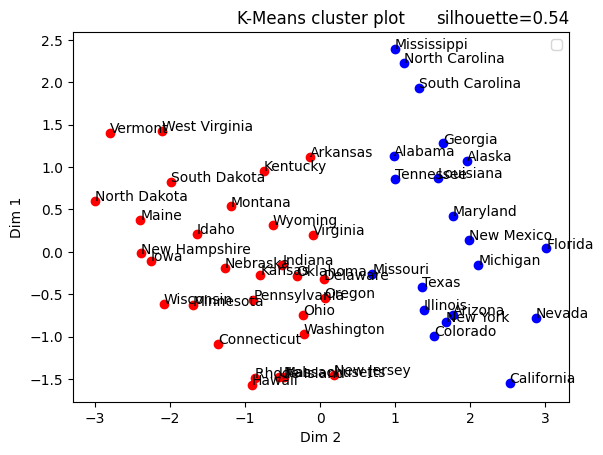

In [417]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Adding cluster labels to the dataframe 
df['Kmeans_Cluster'] = clusters

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = pca_df.index[i]
        ax.annotate(txt, (x[i], y[i]))

# Calculate silhouette score        
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)

plt.title('silhouette={}'.format(score), loc='right')
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

 <b>K-means clustering analysis:</b>
 - The data appears to be clusted based on crime rates. This can be confirmed further by comparing this data with that of the biplot generated during the PCA Standardised data analysis.

In [418]:
# Hierarchical clusters

# Extract indices for each cluster
group0_indices = np.argwhere(df["Hierarchical_Cluster"] == 0).transpose()[0]
group1_indices = np.argwhere(df["Hierarchical_Cluster"] == 1).transpose()[0]

# Get city names for each cluster
group0 = df.index[group0_indices].tolist()
group1 = df.index[group1_indices].tolist()

print("Hierarchical clusters: ")

# Print city names in each cluster
print("Group 0: {}\n".format(group0))
print("Group 1: {}\n".format(group1))

Hierarchical clusters: 
Group 0: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']

Group 1: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']



In [419]:
# K-means clusters

# Extract indices for each cluster
group0_indices = np.argwhere(df["Kmeans_Cluster"] == 0).transpose()[0]
group1_indices = np.argwhere(df["Kmeans_Cluster"] == 1).transpose()[0]

# Get city names for each cluster
group0 = df.index[group0_indices].tolist()
group1 = df.index[group1_indices].tolist()

print("K-means clusters: ")

# Print city names in each cluster
print("Group 0: {}\n".format(group0))
print("Group 1: {}\n".format(group1))

K-means clusters: 
Group 0: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']

Group 1: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']



In [420]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Hierarchical_Cluster,Kmeans_Cluster
City,,,,,,
Alabama,13.200,236,58,21.200,0,0
Alaska,10.000,263,48,44.500,0,0
Arizona,8.100,294,80,31.000,0,0
Arkansas,8.800,190,50,19.500,1,1
California,9.000,276,91,40.600,0,0
Colorado,7.900,204,78,38.700,0,0
Connecticut,3.300,110,77,11.100,1,1
Delaware,5.900,238,72,15.800,1,1
Florida,15.400,335,80,31.900,0,0


## Conclusion:


##### <b> Hierarchical clustering vs. K-means clustering</b>

- <i>K-means silhouette score of 0.57:</i> This suggests that the clusters identified by the K-means algorithm are reasonably well-separated and distinct, indicating a fairly good clustering result.
- <i>Hierarchical clustering silhouette score of 0.47:</i> This indicates that the clusters identified by hierarchical clustering are moderately well-separated but not as distinct as those identified by K-means.
- Based on the scores, K-means has produced better-defined clusters for the data compared to hierarchical clustering. This suggests that K-means is more suitable for this specific dataset and the structure within it.
- Despite the difference in silhouette scores, both clustering techniques have clustered the various cities into the exact same clusters. This consistency might be attributed to the simplicity of the data, implying that the underlying structure is straightforward and both methods are capturing it similarly.

### References
- https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd 
- Capstone project 12 pdf
- example_plots.ipynb
- https://rdrr.io/r/datasets/USArrests.html 
- https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests 
- https://erdogant.github.io/pca/pages/html/Algorithm.html 
- https://www.linkedin.com/advice/1/what-role-does-scaling-normalization-play-clustering-3fnuf#:~:text=Scaling%20is%20crucial%20in%20clustering,potentially%20leading%20to%20skewed%20results.
- PCA.ipynb - Task 10
- https://dataknowsall.com/blog/pcavisualized.html 